# Download dataset dari kaggle

In [ ]:
!kaggle datasets download -d techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 99% 425M/427M [00:04<00:00, 121MB/s]
100% 427M/427M [00:04<00:00, 101MB/s]


In [ ]:
!unzip waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import shutil
from sklearn.model_selection import train_test_split
import os
import shutil
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Jumlah dataset

In [ ]:
train_path = os.path.join("DATASET", "TRAIN")
test_path = os.path.join("DATASET", "TEST")

# Fungsi untuk menghitung jumlah gambar di setiap kelas
def count_images_in_directory(directory_path):
    classes = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]
    total_images = 0
    print(f"Total Images Per Class in '{directory_path}':")
    for cls in classes:
        class_path = os.path.join(directory_path, cls)
        num_images = len([img for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))])
        total_images += num_images
        print(f" - {cls}: {num_images} images")
    return total_images

# Menghitung total gambar di train dan test
total_train_images = count_images_in_directory(train_path)
total_test_images = count_images_in_directory(test_path)

print(f"\nTotal Train Dataset: {total_train_images} images")
print(f"Total Test Dataset: {total_test_images} images")


Total Images Per Class in 'DATASET/TRAIN':
 - O: 12565 images
 - R: 9999 images
Total Images Per Class in 'DATASET/TEST':
 - O: 1401 images
 - R: 1112 images

Total Train Dataset: 22564 images
Total Test Dataset: 2513 images


# Distribusi dataset

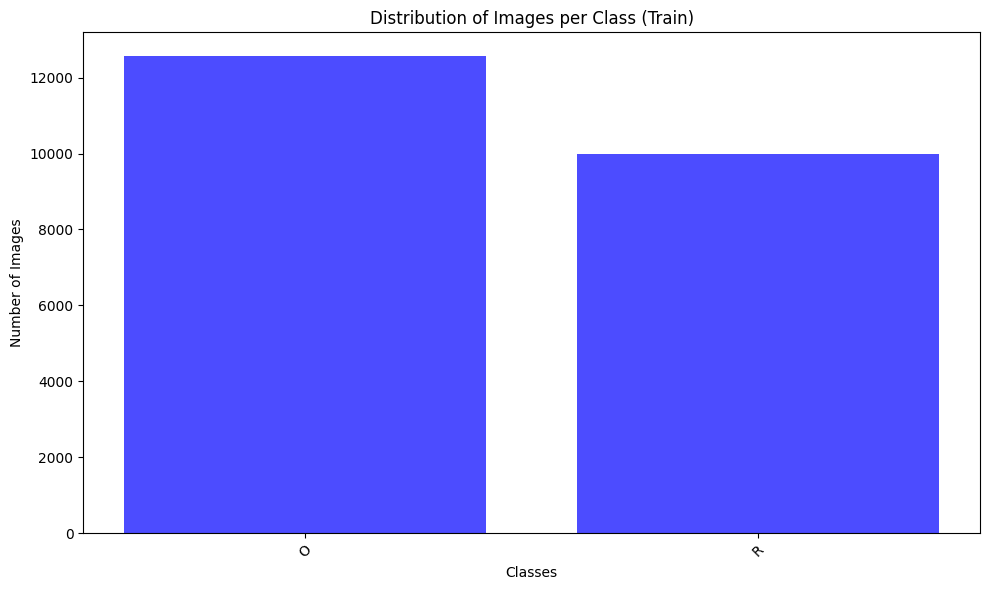

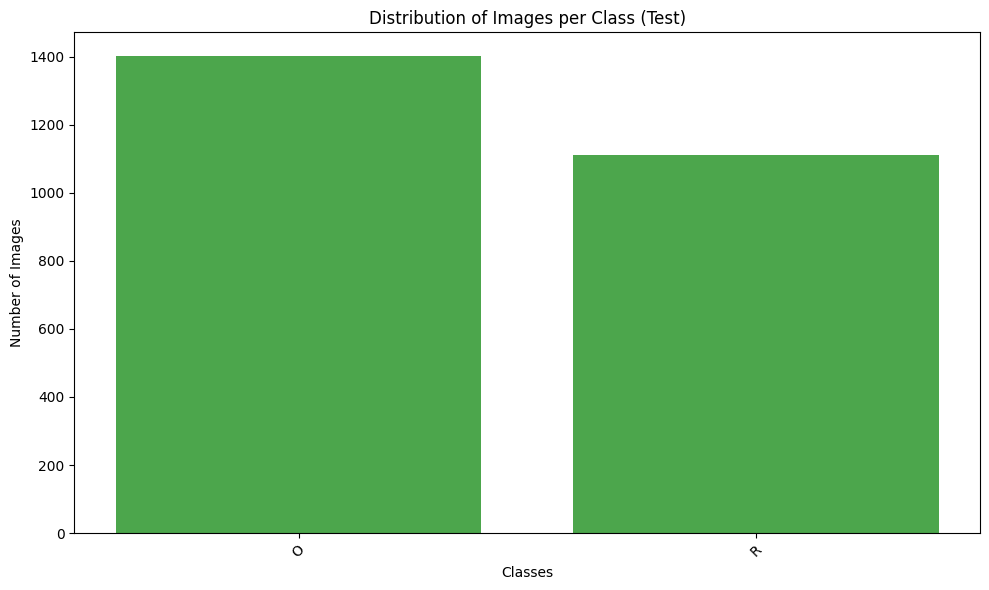

In [ ]:
train_path = os.path.join("DATASET", "TRAIN")
test_path = os.path.join("DATASET", "TEST")

# Fungsi untuk menghitung jumlah file di setiap kelas
def count_images_in_directory(directory_path):
    classes = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]
    class_counts = {cls: len(os.listdir(os.path.join(directory_path, cls))) for cls in classes}
    return class_counts

# Menghitung jumlah file di train dan test
train_class_counts = count_images_in_directory(train_path)
test_class_counts = count_images_in_directory(test_path)
# Membuat grafik distribusi untuk train
plt.figure(figsize=(10, 6))
plt.bar(train_class_counts.keys(), train_class_counts.values(), color='blue', alpha=0.7)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class (Train)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat grafik distribusi untuk test
plt.figure(figsize=(10, 6))
plt.bar(test_class_counts.keys(), test_class_counts.values(), color='green', alpha=0.7)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class (Test)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Preprocessing

In [ ]:
# Path ke dataset yang telah di-split
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"

# Dimensi gambar
img_width, img_height = 128, 128

# Hyperparameters
batch_size = 32
epochs = 50

In [ ]:
# Data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalisasi untuk training dataset (tanpa augmentasi)
train_datagen = ImageDataGenerator(rescale=1.0/255)

# Normalisasi untuk validation dataset
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generator untuk training dataset
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generator untuk validation dataset
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)

{'O': 0, 'R': 1}


# CNN


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

learning_rate = 0.000001

# Definisi model CNN
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Dropout(0.4),
    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Optimizer dengan learning rate
optimizer = Adam(learning_rate=learning_rate)

# Kompilasi model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Ringkasan model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,062,466 (99.42 MB)

 Trainable params: 26,062,466 (99.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Latih model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=25,
    batch_size=batch_size
)

Epoch 1/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 48s 63ms/step - accuracy: 0.6591 - loss: 0.6354 - val_accuracy: 0.8468 - val_loss: 0.4176
Epoch 2/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.7792 - loss: 0.4761 - val_accuracy: 0.8587 - val_loss: 0.3733
Epoch 3/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.7959 - loss: 0.4494 - val_accuracy: 0.8575 - val_loss: 0.3690
Epoch 4/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.8010 - loss: 0.4410 - val_accuracy: 0.8615 - val_loss: 0.3630
Epoch 5/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8048 - loss: 0.4316 - val_accuracy: 0.8659 - val_loss: 0.3524
Epoch 6/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.8113 - loss: 0.4237 - val_accuracy: 0.8663 - val_loss: 0.3471
Epoch 7/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.8121 - loss: 0.4230 - val_accuracy: 0.8683 - val_loss: 0.3450
Epoch 8/25
706/706 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8147 - loss: 0.4179 - 

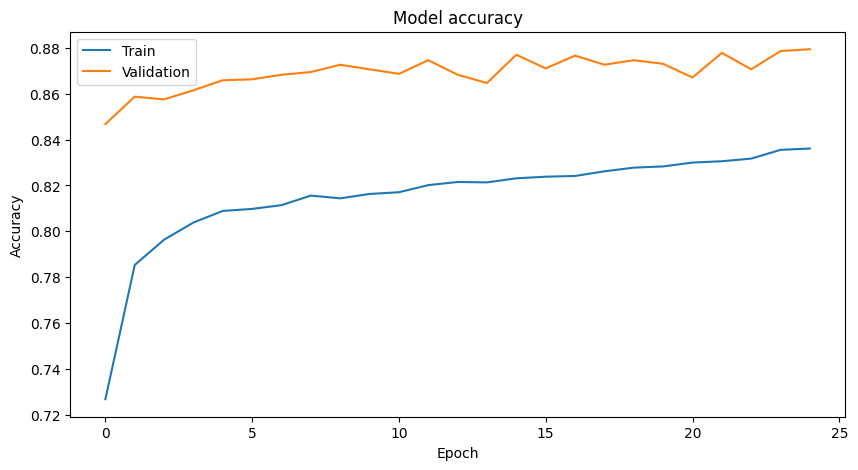

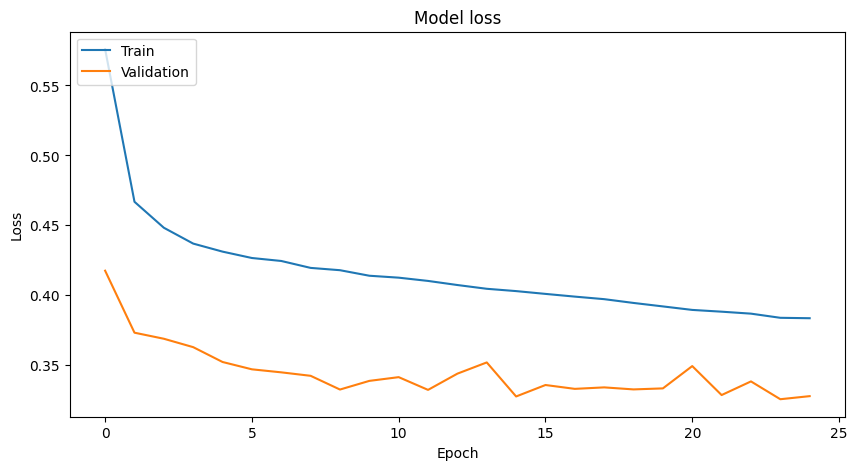

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Klasifikasi Report
target_names = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step

Classification Report:
              precision    recall  f1-score   support

           O       0.85      0.96      0.90      1401
           R       0.93      0.78      0.85      1112

    accuracy                           0.88      2513
   macro avg       0.89      0.87      0.88      2513
weighted avg       0.89      0.88      0.88      2513


Confusion Matrix:
[[1339   62]
 [ 241  871]]


In [ ]:
# Simpan model
model.save('final_model.h5')
print("Model saved as 'final_model.h5'")

Model saved as 'final_model.h5'


# Pre train

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Jumlah kelas
num_classes = train_generator.num_classes

# Load MobileNetV2 sebagai base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze semua layer dari base model agar tidak di-train ulang
base_model.trainable = False

# Custom layer
custom_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Kompilasi model
custom_model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Learning rate yang lebih kecil karena transfer learning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Ringkasan model
custom_model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Convert class weights to dictionary
class_weight_dict = dict(enumerate(class_weights))

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

# Train the model with class weights
history = custom_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    batch_size=batch_size,
    class_weight=class_weight_dict, # Use class weights
    callbacks=[early_stop, reduce_lr] # Use callbacks
)

Epoch 1/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 48s 56ms/step - accuracy: 0.7855 - loss: 0.4567 - val_accuracy: 0.8894 - val_loss: 0.2619 - learning_rate: 1.0000e-04
Epoch 2/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 64s 36ms/step - accuracy: 0.9164 - loss: 0.2194 - val_accuracy: 0.9129 - val_loss: 0.2284 - learning_rate: 1.0000e-04
Epoch 3/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9236 - loss: 0.1969 - val_accuracy: 0.8997 - val_loss: 0.2489 - learning_rate: 1.0000e-04
Epoch 4/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9322 - loss: 0.1723 - val_accuracy: 0.9192 - val_loss: 0.2124 - learning_rate: 1.0000e-04
Epoch 5/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9367 - loss: 0.1628 - val_accuracy: 0.9009 - val_loss: 0.2501 - learning_rate: 1.0000e-04
Epoch 6/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.9442 - loss: 0.1449 - val_accuracy: 0.9097 - val_loss: 0.2406 - learning_rate: 1.0000e-04
Epoch 7/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/ste

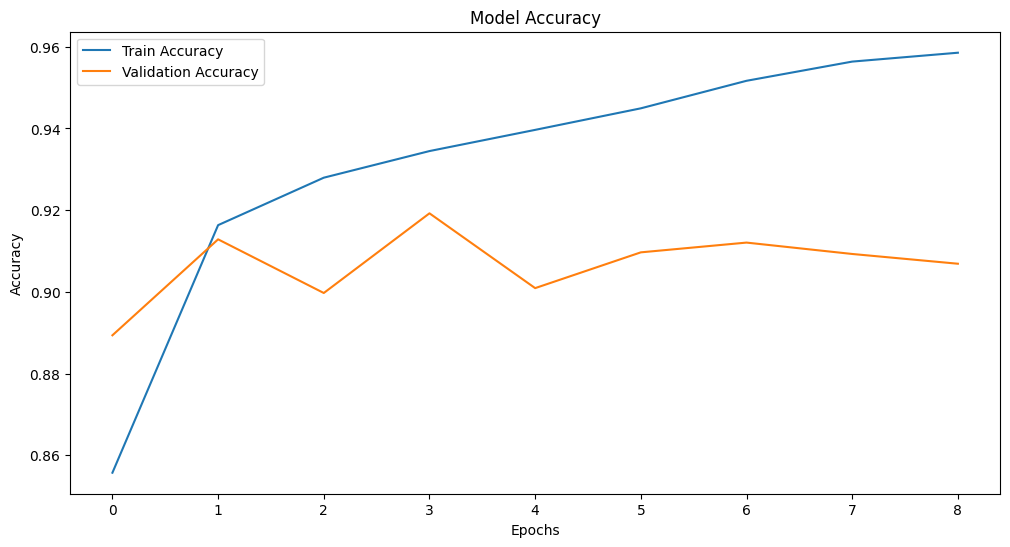

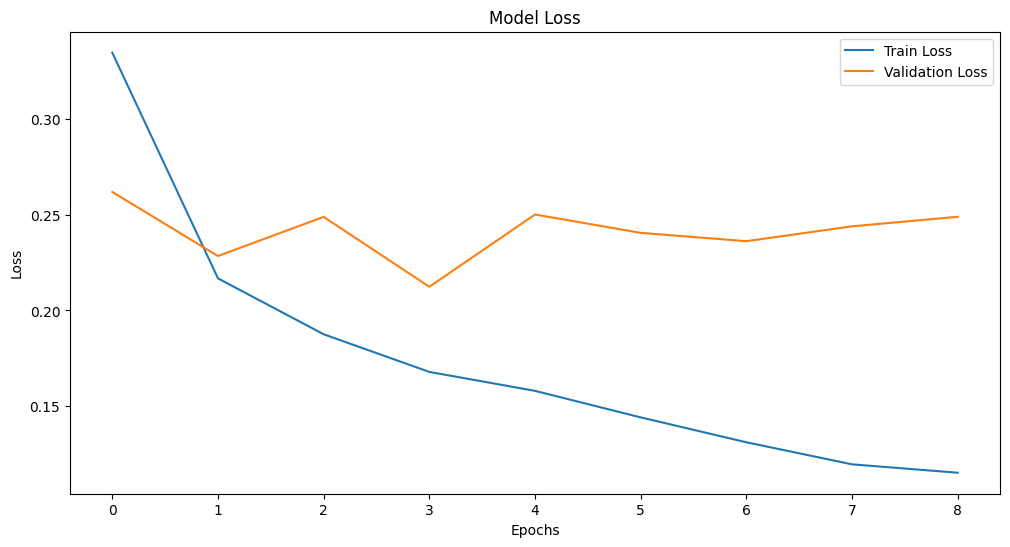

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Prediksi pada validation dataset
test_generator.reset()
y_pred = custom_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Klasifikasi Report
from sklearn.metrics import classification_report, confusion_matrix

target_names = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step

Classification Report:
              precision    recall  f1-score   support

           O       0.90      0.96      0.93      1401
           R       0.95      0.87      0.90      1112

    accuracy                           0.92      2513
   macro avg       0.92      0.91      0.92      2513
weighted avg       0.92      0.92      0.92      2513


Confusion Matrix:
[[1347   54]
 [ 149  963]]


In [ ]:
# prompt: simpan model mobilenet dan download

from google.colab import files
custom_model.save('mobilenet_model.h5')
files.download('mobilenet_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>